# Lectures 5-6: Statistics

## Example: mean, standard deviation of a sample

In [10]:
# standard preamble
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

Read randomly sampled data from a file, histogram it

Number of samples = 17
Mean = 5.2
Median = 5.0
Mode = 4.0
Mode from SciPy = 4.0
Standard deviation = 2.2


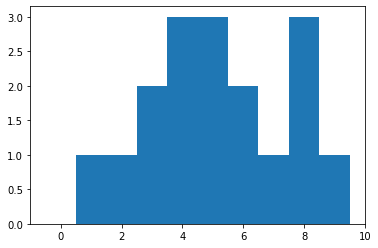

In [11]:
x = np.loadtxt('sample.dat')
print('Number of samples =',len(x))

bins = np.arange(-0.5,10.5,1)
n, b, p = plt.hist(x, bins)

# various measures of "average value":
print ('Mean = {0:3.1f}'.format(np.mean(x)))
print ('Median = {0:3.1f}'.format(np.median(x)))
print ('Mode = {0:3.1f}'.format(0.5*(bins[np.argmax(n)]+bins[np.argmax(n)+1])))
mode, count = sp.stats.mode(x)
print('Mode from SciPy = {0:3.1f}'.format(mode[0]))

# measure of the spread
print ('Standard deviation = {0:3.1f}'.format(np.std(x)))

[209.60967884 223.52881768 189.04750733 232.40406041 207.51799778
 202.54639343 212.33213111 184.15407106 214.80289361 196.94753622]
Mean = 199.74
Median = 200.96
Mode = 214.84
Standard deviation =  23.8


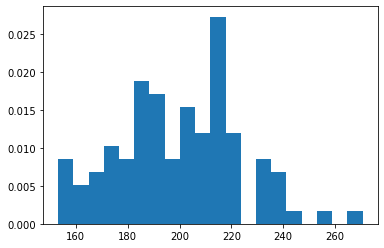

In [12]:
# create a set of data and compute mean and variance
# This creates an array of 100 elements, 
# gaussian-distributed with mean of 200 and RMS of 25
mu = 200
sigma = 25
x = mu + sigma*np.random.randn(100)
print (x[0:10])
n, bins, patches = plt.hist(x, 20, density=True)  # NB: new keyword in Matplotlib 3.3 

# various measures of "average value":
print ('Mean = {0:5.2f}'.format(np.mean(x)))
print ('Median = {0:5.2f}'.format(np.median(x)))
print ('Mode = {0:5.2f}'.format(0.5*(bins[np.argmax(n)]+bins[np.argmax(n)+1])))

# measure of the spread
print ('Standard deviation = {0:5.1f}'.format(np.std(x)))


Example of a Poisson process

Number of samples = 17


Text(0, 0.5, 'Samples')

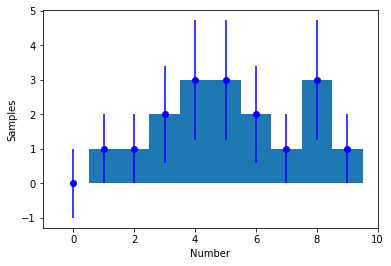

In [36]:
x = np.loadtxt('sample.dat')
N = len(x)
print('Number of samples =',N)

bins = np.arange(-0.5,10.5,1)
n, b, p = plt.hist(x, bins)
expected = 0.1*N*np.ones(len(n))
# loop over all entries in the histogram, compute chi^2 assuming 
# Poisson errors for each bin

en = np.zeros(len(n))
for i in range(0,10):
    value = n[i]
    error = np.sqrt(value)
    if value == 0:
        error = 1
    en[i] = error
    
# plot the distribition with error bars
x = np.arange(0,10)
plt.errorbar(x, n, xerr=0, yerr=en, fmt='bo')
plt.xlabel('Number')
plt.ylabel('Samples')

### Central limit theorem

Central limit theorem states that if you have any PDF with mean $\mu$ and variance $\sigma^2$, and you draw $N$ samples $\{ x_i \},\ i=[1..N]$ from the distribution, the PDF of the <b>sample mean</b>
$$
\mu_s = \frac{1}{N}\sum_{i=1}^N x_i
$$
approaches Gaussian with mean $\langle \mu_s\rangle = \mu$ and variance 
$\sigma_s^2 = \sigma^2/N$ when $N\to\infty$

Let's look at the example. Take the data collected in class:

$$N=17$$
$$f(x_i) = \frac{1}{10}, x_i\in[0..9]$$


In [14]:
# compute mean and sigma of the parent distribution

mu = 0
sigma = 0
prob = 1./10.
for i in range(0,10):
    mu += prob*i
print('mu = {0:4.2f}'.format(mu))

for i in range(0,10):
    sigma += prob*(i-mu)**2
sigma = np.sqrt(sigma)
print('sigma = {0:4.2f}'.format(sigma))
print('As an exercise for the reader, prove analytically that sigma = ',10/np.sqrt(12))


mu = 4.50
sigma = 2.87
As an exercise for the reader, prove analytically that sigma =  2.886751345948129


We will now draw 17 random <i>integer</i> numbers uniformly distributed between 0 and 9 inclusively, and compute the mean of the distribution. Let's define a function for that, as we would be calling it a large number of times

In [18]:
def drawN(N):
    samples = np.random.randint(0,10,N)
    return np.mean(samples)

N = 17
print(drawN(N))

3.9411764705882355


Now let's look at a population of the means

Mean =  4.51
Median =  4.50
Mode =  4.66
Standard deviation =  0.64
Predicted value of standard deviation =  0.6422616289332564


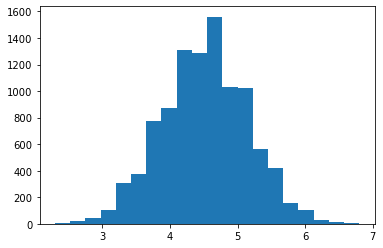

In [20]:
Ndraws = 10000
x = np.empty(Ndraws)
N = 20
for i in range(Ndraws):
    x[i] = drawN(N)
    
n, bins, patches = plt.hist(x, 20, density=False)

# various measures of "average value":
print ('Mean = {0:5.2f}'.format(np.mean(x)))
print ('Median = {0:5.2f}'.format(np.median(x)))
print ('Mode = {0:5.2f}'.format(0.5*(bins[np.argmax(n)]+bins[np.argmax(n)+1])))

# measure of the spread
print ('Standard deviation = {0:5.2f}'.format(np.std(x)))

# check
print('Predicted value of standard deviation = ',sigma/np.sqrt(N))

## Fitting

The simplest technique to describe is least-squares fitting (see lecture notes). Usually you use the least-squares fit if you have a graph (i.e. a set of data points $y_i(x_i)$), you want to describe it in terms of a model $y(x;\theta)$, where parameters $\theta$ are unknown. You fit to determine the values of $\theta$ and (hopefully) their uncertainties.  

There are two standard cases where least-squares method is applicable:
1. You know errors for each data point $\sigma_i$ and you know that those errors are Gaussian. In this case, you minimize $\chi^2=\sum \left(\frac{y_i - y(x_i;\theta)}{\sigma_i}\right)^2$. The value of the $\chi^2_{\min}$ can be interpreted as a goodness-of-fit, and the errors on parameters $\theta$ have probabilistic interpretation
1. You know that the errors are Gaussian and are the same for each data point, but you do not know their magnitude. In this case, you would minimize the sum of squares: $\mathcal{S} = \sum \left(y_i - y(x_i;\theta)\right)^2$. In this case the value of $\mathcal{S}$ can be used to compute the errors $\sigma_i$ for each data point, and the errors on $\theta$ have probabilistic definition, but you lose information about the goodness of fit
1. If the errors are not known to be Gaussian, then the least square method is not useful to estimate uncertainties or the goodness of fit. It is also not guaranteed to be unbiased or most efficient. 

### Examples

#### Polynomial fit

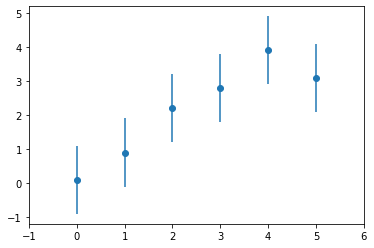

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as fitter


# Generate artificial data = straight line with a=0 and b=1
# plus some noise.
a0 = 0
b0 = 1
xdata = np.array([0.0,1.0,2.0,3.0,4.0,5.0])
ydata = np.array([0.1,0.9,2.2,2.8,3.9,3.1])
sigma = np.array([1.0,1.0,1.0,1.0,1.0,1.0])

# plot it
plt.errorbar(xdata, ydata, xerr=0, yerr=sigma, fmt='o')
plt.xlim(-1,6)
plt.show()

Now define a the model:

In [22]:
# linear function
def model(x, a, b):
    return a + b*x

The fitter needs a good initial guess of parameters (more on that later):

[0.40952381 0.70285714]
[[ 0.19750113 -0.05386395]
 [-0.05386395  0.02154558]]
a= 0.410+/-0.444
b= 0.703+/-0.147
[[ 1.         -0.82572283]
 [-0.82572283  1.        ]]
chi^2 =  1.51
chi^2/d.f.= 0.38


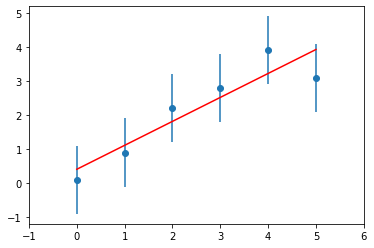

In [23]:
# Initial guess.
par0    = np.array([0.0, 1.0])
par, cov = fitter.curve_fit(model, xdata, ydata, p0=par0, sigma=sigma)
print (par)
print (cov)

# decode it now
print ('a={0:6.3f}+/-{1:5.3f}'.format(par[0],np.sqrt(cov[0,0])))
print ('b={0:6.3f}+/-{1:5.3f}'.format(par[1],np.sqrt(cov[1,1])))

corr = cov.copy() # copy shape
# compute correlation matrix
for i in range(len(par)):
    for j in range(len(par)):
        corr[i,j] = cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])
        
print (corr)

# compute reduced chi2
chi_squared = np.sum(((model(xdata, *par)-ydata)/sigma)**2)
reduced_chi_squared = (chi_squared)/(len(xdata)-len(par))
print ('chi^2 = {0:5.2f}'.format(chi_squared))
print ('chi^2/d.f.={0:5.2f}'.format(reduced_chi_squared))

# overlay plot over data
plt.errorbar(xdata, ydata, xerr=0, yerr=sigma, fmt='o')
plt.xlim(-1,6)
xfit = np.linspace(0,5,50)
plt.plot(xfit,model(xfit,par[0],par[1]),'r-')
plt.show()

[-0.11428571  1.48857143 -0.15714286]
[[ 0.16053059 -0.11516325  0.01744898]
 [-0.11516325  0.14203469 -0.02617347]
 [ 0.01744898 -0.02617347  0.00523469]]
a=-0.114+/-0.401
b= 1.489+/-0.377
c=-0.157+/-0.072
[[ 1.         -0.76267202  0.60192927]
 [-0.76267202  1.         -0.95988329]
 [ 0.60192927 -0.95988329  1.        ]]
chi^2 =  0.59
chi^2/d.f.= 0.20


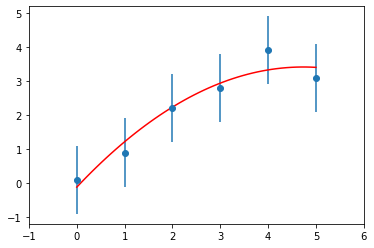

In [24]:
from numpy import sqrt

# quadratic function
def model2(x, a, b, c):
    return a + b*x + c*x*x

par0    = np.array([0.0, 1.0, 0.0])
par, cov = fitter.curve_fit(model2, xdata, ydata, par0, sigma)
print (par)
print (cov)

# decode it now
print ('a={0:6.3f}+/-{1:5.3f}'.format(par[0],sqrt(cov[0,0])))
print ('b={0:6.3f}+/-{1:5.3f}'.format(par[1],sqrt(cov[1,1])))
print ('c={0:6.3f}+/-{1:5.3f}'.format(par[2],sqrt(cov[2,2])))

corr = cov.copy() # copy shape
# compute correlation matrix
for i in range(len(par)):
    for j in range(len(par)):
        corr[i,j] = cov[i,j]/sqrt(cov[i,i]*cov[j,j])
        
print (corr)

# compute reduced chi2
chi_squared = np.sum(((model2(xdata, *par)-ydata)/sigma)**2)
reduced_chi_squared = (chi_squared)/(len(xdata)-len(par))
print ('chi^2 = {0:5.2f}'.format(chi_squared))
print ('chi^2/d.f.={0:5.2f}'.format(reduced_chi_squared))

# overlay plot over data
plt.errorbar(xdata, ydata, xerr=0, yerr=sigma, fmt='o')
plt.xlim(-1,6)
xfit = np.linspace(0,5,50)
plt.plot(xfit,model2(xfit,par[0],par[1], par[2]),'r-')
plt.show()

[-0.11428571  1.48857143 -0.15714286]
[[ 0.16053062 -0.11516326  0.01744898]
 [-0.11516326  0.14203468 -0.02617347]
 [ 0.01744898 -0.02617347  0.00523469]]
[[ 1.         -0.76267202  0.60192925]
 [-0.76267202  1.         -0.95988328]
 [ 0.60192925 -0.95988328  1.        ]]
chi^2 =  0.59
chi^2/d.f.= 0.20


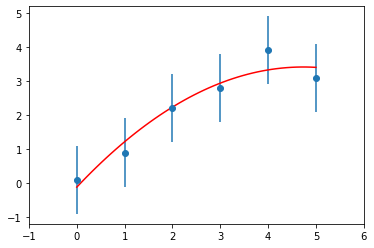

In [25]:
# Nth-order poly function
def modelN(*arg):
    x = arg[0]
    N = len(arg)-1
    sum = arg[1]
    for i in range(1,N):
        sum += arg[i+1]*x**i
    return sum

N=2   # poly degree
par0    = np.zeros(N+1)
par[1]=1
par, cov = fitter.curve_fit(modelN, xdata, ydata, par0, sigma)
print (par)
print (cov)

corr = cov.copy() # copy shape
# compute correlation matrix
for i in range(len(par)):
    for j in range(len(par)):
        corr[i,j] = cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])
        
print (corr)

# compute reduced chi2
chi_squared = np.sum(((modelN(xdata, *par)-ydata)/sigma)**2)
reduced_chi_squared = (chi_squared)/(len(xdata)-len(par))
print ('chi^2 = {0:5.2f}'.format(chi_squared))
print ('chi^2/d.f.={0:5.2f}'.format(reduced_chi_squared))

# overlay plot over data
plt.errorbar(xdata, ydata, xerr=0, yerr=sigma, fmt='o')
plt.xlim(-1,6)
xfit = np.linspace(0,5,50)
plt.plot(xfit,modelN(xfit,*par),'r-')
plt.show()

### Caveat: correlations

You may notice that poly parameters are highly correlated. You can reduce them by using *Chebychev polynomials*. Here is an example:

[2.16666667 0.70285714]
[[6.28412704e-02 1.52261452e-10]
 [1.52261452e-10 2.15455784e-02]]
a= 2.167+/-0.251
b= 0.703+/-0.147
[[1.00000000e+00 4.13798023e-09]
 [4.13798023e-09 1.00000000e+00]]
chi^2 =  1.51
chi^2/d.f.= 0.38


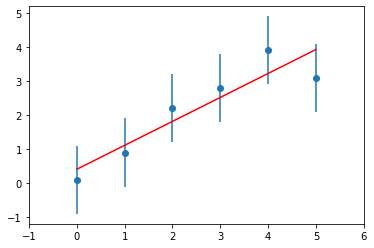

In [26]:
# linear function
def modelC(x, a, b):
    return a + b*(x-2.5)

# Initial guess.
par0    = np.array([0.0, 1.0])
par, cov = fitter.curve_fit(modelC, xdata, ydata, par0, sigma)
print (par)
print (cov)

# decode it now
print ('a={0:6.3f}+/-{1:5.3f}'.format(par[0],sqrt(cov[0,0])))
print ('b={0:6.3f}+/-{1:5.3f}'.format(par[1],sqrt(cov[1,1])))

corr = cov.copy() # copy shape
# compute correlation matrix
for i in range(len(par)):
    for j in range(len(par)):
        corr[i,j] = cov[i,j]/sqrt(cov[i,i]*cov[j,j])
        
print (corr)

# compute reduced chi2
chi_squared = np.sum(((modelC(xdata, *par)-ydata)/sigma)**2)
reduced_chi_squared = (chi_squared)/(len(xdata)-len(par))
print ('chi^2 = {0:5.2f}'.format(chi_squared))
print ('chi^2/d.f.={0:5.2f}'.format(reduced_chi_squared))

# overlay plot over data
plt.errorbar(xdata, ydata, xerr=0, yerr=sigma, fmt='o')
plt.xlim(-1,6)
xfit = np.linspace(0,5,50)
plt.plot(xfit,modelC(xfit,par[0],par[1]),'r-')
plt.show()

### Warning: Lack of robustness
Gradient methods such as *Levenburg-Marquardt* used by *leastsq/curve_fit* are not robust and simply run into the nearest local minimum. Therefore, it is important to provide the initial set of values that are "close enough". Here is the demonstration below (courtesy https://python4mpia.github.io/fitting_data/least-squares-fitting.html)


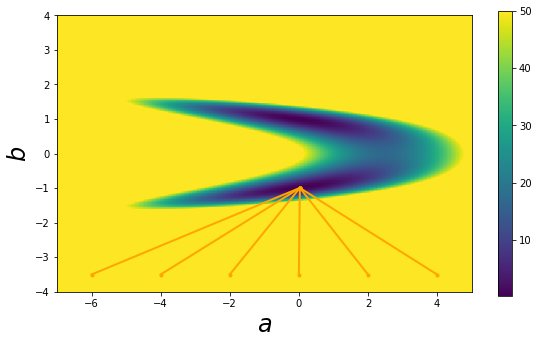

In [27]:
import numpy,math
import scipy.optimize as optimization
import matplotlib.pyplot as plt

# Chose a model that will create bimodality.
def func(x, a, b):
    return a + b*b*x  # Term b*b will create bimodality.

# Create toy data for curve_fit.
xdata = numpy.array([0.0,1.0,2.0,3.0,4.0,5.0])
ydata = numpy.array([0.1,0.9,2.2,2.8,3.9,5.1])
sigma = numpy.array([1.0,1.0,1.0,1.0,1.0,1.0])

# Compute chi-square manifold.
Steps = 101  # grid size
Chi2Manifold = numpy.zeros([Steps,Steps])  # allocate grid
amin = -7.0  # minimal value of a covered by grid
amax = +5.0  # maximal value of a covered by grid
bmin = -4.0  # minimal value of b covered by grid
bmax = +4.0  # maximal value of b covered by grid
for s1 in range(Steps):
    for s2 in range(Steps):
        # Current values of (a,b) at grid position (s1,s2).
        a = amin + (amax - amin)*float(s1)/(Steps-1)
        b = bmin + (bmax - bmin)*float(s2)/(Steps-1)
        # Evaluate chi-squared.
        chi2 = 0.0
        for n in range(len(xdata)):
            residual = (ydata[n] - func(xdata[n], a, b))/sigma[n]
            chi2 = chi2 + residual*residual
        Chi2Manifold[Steps-1-s2,s1] = chi2  # write result to grid.

# Plot grid.
plt.figure(1, figsize=(8,4.5))
plt.subplots_adjust(left=0.09, bottom=0.09, top=0.97, right=0.99)
# Plot chi-square manifold.
image = plt.imshow(Chi2Manifold, vmax=50.0,
              extent=[amin, amax, bmin, bmax])
# Plot where curve-fit is going to for a couple of initial guesses.
for a_initial in -6.0, -4.0, -2.0, 0.0, 2.0, 4.0:
    # Initial guess.
    x0   = numpy.array([a_initial, -3.5])
    xFit = optimization.curve_fit(func, xdata, ydata, x0, sigma)[0]
    plt.plot([x0[0], xFit[0]], [x0[1], xFit[1]], 'o-', ms=4,
                 markeredgewidth=0, lw=2, color='orange')
plt.colorbar(image)  # make colorbar
plt.xlim(amin, amax)
plt.ylim(bmin, bmax)
plt.xlabel(r'$a$', fontsize=24)
plt.ylabel(r'$b$', fontsize=24)
plt.show()

### Example: histogram fitting 

Here is an example of an unbinned *max-likelihood* fit of a set of events to a Gaussian PDF
Courtesy http://glowingpython.blogspot.com/2012/07/distribution-fitting-with-scipy.html

(-0.06870196333559465, 1.0612387939235612)


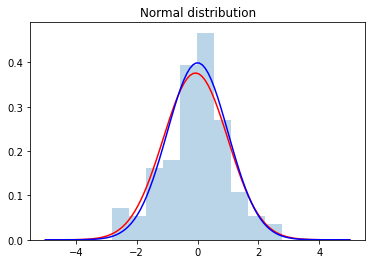

In [34]:
from scipy.stats import norm
from numpy import linspace
from pylab import plot,show,hist,figure,title

# generate 100 events from a normal distrubution
# with mean 0 and standard deviation 1
sample = norm.rvs(loc=0,scale=1,size=100) 

par = norm.fit(sample) # distribution fitting

#hist(sample,20)

print (par)

# now, par[0] and par[1] are the mean and 
# the standard deviation of the fitted distribution
x = linspace(-5,5,100)
# fitted distribution
pdf_fitted = norm.pdf(x,loc=par[0],scale=par[1])
# original distribution
pdf = norm.pdf(x)

title('Normal distribution')
hist(sample,density=True,alpha=.3)
plot(x,pdf_fitted,'r-',x,pdf,'b-')
show()

### Hypothesis testing

Let's test if the distribution collected in class (poll of 54 students of any number from 0 to 9 inclusively) is consistent with a uniform distribution. How would we do it ? 

Try #1: compute the likelihood for this dataset, i.e. the probability to observe exactly the dataset we observe, based on Poisson statistics

Number of samples = 17
Log(likelihood) =  -14.740892500747158
Probability =  3.9637999568066756e-07


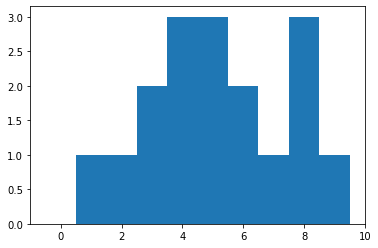

In [29]:
x = np.loadtxt('sample.dat')
N = len(x)
print('Number of samples =',N)

bins = np.arange(-0.5,10.5,1)
n, b, p = plt.hist(x, bins)
expected = 0.1*N

# loop over all entries in the histogram, compute chi^2 assuming 
# Poisson errors for each bin

logL = 0
for i in range(0,10):
    value = n[i]
    logL += sp.stats.poisson.logpmf(value,mu=expected)

print('Log(likelihood) = ',logL)
print('Probability = ',np.exp(logL))


Does the fact that the total probability is so small indicate that the hypothesis is invalid ? Not necessarily. We are looking at one particular outcome -- and the sheer number of all possible outcomes is large. So let's compute what a typical distribution of likelihood values is for a default hypothesis and 17 sampled students

p-value of logL= -14.740892500747158  is  72.04


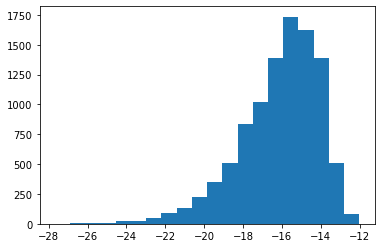

In [30]:
Ntrials = 10000
logL_try = np.zeros(Ntrials)

for itry in range(0,Ntrials):
    # generate a random Poisson-distributed number for each bin
    n = sp.stats.poisson.rvs(mu=expected, size=10)
    logL_try[itry] = 0
    for j in range(0,10):
        value = n[j]
        logL_try[itry] += sp.stats.poisson.logpmf(value,mu=expected)

# plot the distribution
entries, bins, patches = plt.hist(logL_try, 20)

# compare the observed likelihood to the population
pval = sp.stats.percentileofscore(logL_try,logL)
print('p-value of logL=',logL,' is ',pval)

Try #2: compute the $\chi^2$ with respect to the uniform population hypothesis. 

Number of samples = 17
chi2 =  6.630000000000002  for  9 df
p-value = 0.68
p-value from stats package =  0.7457908772633433


Text(0, 0.5, 'Samples')

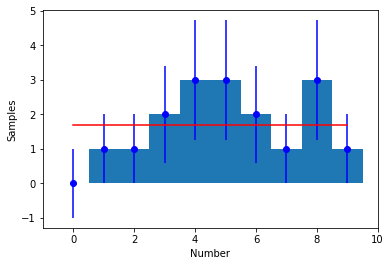

In [33]:
x = np.loadtxt('sample.dat')
N = len(x)
print('Number of samples =',N)

bins = np.arange(-0.5,10.5,1)
n, b, p = plt.hist(x, bins)
expected = 0.1*N*np.ones(len(n))
# loop over all entries in the histogram, compute chi^2 assuming 
# Poisson errors for each bin

en = np.zeros(len(n))
chi2 = 0
for i in range(0,10):
    value = n[i]
    error = np.sqrt(value)
    if value == 0:
        error = 1
    en[i] = error
    
    chi2 += ((value - expected[i])/error)**2

ndf = len(n)-1  # why -1 ? 
print('chi2 = ',chi2,' for ',ndf, 'df')
print('p-value = {0:4.2f}'.format(sp.stats.chi2.sf(chi2,ndf)))

# alternative way to compute p-value
chi2_sp, p_sp = sp.stats.chisquare(n)
print('p-value from stats package = ',p_sp)

# plot the distribition with error bars
x = np.arange(0,10)
plt.errorbar(x, n, xerr=0, yerr=en, fmt='bo')
plt.plot(x,expected,'r-')
plt.xlabel('Number')
plt.ylabel('Samples')